In [196]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [197]:
with open('/content/drive/MyDrive/CV/input1.txt') as f:
    lines = f.readlines()

In [198]:
def split_inputs(lines_inp):
  wh_exp = lines_inp[0].split(' ')
  h = int(wh_exp[0])
  w = int(wh_exp[1])
  expctd = int(wh_exp[2])
  del lines_inp[0]
  return h, w, expctd

In [199]:
height, width, expected_stars = split_inputs(lines)

In [200]:
def parse_pixel(pixel_str):
  return tuple(map(int, pixel_str.split(", ")))

In [201]:
def make_image(lines_inp, h, w):
  imgflat = [
  parse_pixel(pixel)
  for i in range(h)
  for pixel in lines_inp[i].strip()[1:-1].split(") (")]
  pixels = np.array(imgflat).reshape(h, w, 3)
  return pixels[:,:,0]

In [202]:
img = make_image(lines, height, width)

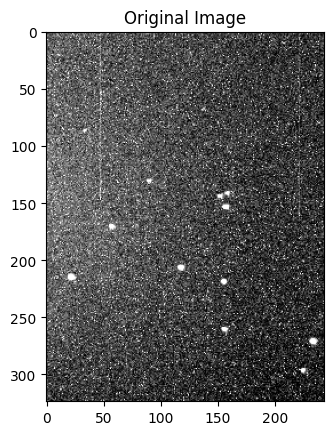

In [203]:
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image")
plt.show()

In [204]:
chang_typ_img = img.astype('uint8')
filt_img = cv2.medianBlur(chang_typ_img, 3) # kernel size = 3
# diameter of each pixel neighborhood = 20
# sigmaColor = 40 (control the range weighting)
# sigmaSpace = 40 (control the spatial weighting)
remov_nois_img = cv2.bilateralFilter(filt_img, 20, 40, 40)

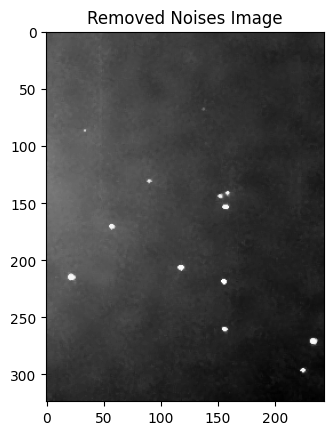

In [205]:
plt.imshow(remov_nois_img, cmap=plt.cm.gray)
plt.title("Removed Noises Image")
plt.show()

In [206]:
# threshold = 150, max value = 255, mode = binary
_, thresh = cv2.threshold(remov_nois_img, 150, 255, cv2.THRESH_BINARY)
# RETR_LIST = All contours are retrieved, CHAIN_APPROX_SIMPLE = Compresses horizontal,
# vertical, diagonal segments and leaves only their end points
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST , cv2.CHAIN_APPROX_SIMPLE)
print(f'Number of Expected Stars: {expected_stars}')
print(f'Number of Detected Stars: {len(contours)}')

Number of Expected Stars: 3
Number of Detected Stars: 12


In [207]:
print("Central points of each founded stars:")
backtorgb = cv2.cvtColor(remov_nois_img,cv2.COLOR_GRAY2RGB)
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    print(f'X = {x + w/2} ,  Y = {y + h/2}')
    result_img = cv2.rectangle(backtorgb,(x,y),(x+w,y+h), (255, 0, 0), 1)

Central points of each founded stars:
X = 224.5 ,  Y = 297.0
X = 234.0 ,  Y = 271.5
X = 156.5 ,  Y = 261.0
X = 155.5 ,  Y = 219.5
X = 22.5 ,  Y = 215.0
X = 118.0 ,  Y = 207.5
X = 58.0 ,  Y = 171.5
X = 157.0 ,  Y = 154.0
X = 152.5 ,  Y = 144.5
X = 159.0 ,  Y = 142.0
X = 90.5 ,  Y = 131.5
X = 34.0 ,  Y = 87.0


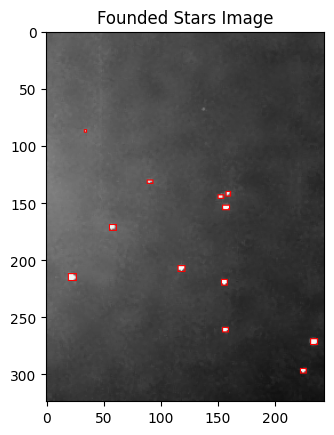

In [208]:
plt.imshow(result_img, cmap=plt.cm.gray)
plt.title("Founded Stars Image")
plt.show()